# Introduction

This data consists of the Bike Share Trip in Los Angeles. From this data we are going to perform some analysis about the time of day people use the bikes most. We are also going to look at the top 5 Stations and analyze their Rush Hour Trend. Enjoy the Analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

# Let us take a look at the data

In [7]:
bike=pd.read_csv('metro-bike-share-trip-data.csv')
bike.head()

Trip ID  Duration               Start Time                 End Time  \
0  18222186     15060  2017-01-19T17:05:00.000  2017-01-19T21:16:00.000   
1   9518671     77160  2016-10-09T14:37:00.000  2016-10-10T12:03:00.000   
2  20444932     86400  2017-02-18T10:15:00.000  2017-02-20T15:20:00.000   
3  20905031     18840  2017-02-27T12:26:00.000  2017-02-27T17:40:00.000   
4  21031476     86400  2017-02-27T20:26:00.000  2017-03-01T09:49:00.000   

   Starting Station ID  Starting Station Latitude  Starting Station Longitude  \
0               3031.0                  34.044701                 -118.252441   
1                  NaN                        NaN                         NaN   
2               3026.0                  34.063179                 -118.245880   
3               3023.0                  34.050911                 -118.240967   
4               3008.0                  34.046612                 -118.262733   

   Ending Station ID  Ending Station Latitude  Ending Station Longitude  \
0             3000.0                      NaN                       NaN   
1             3000.0                      NaN                       NaN   
2             3000.0                      NaN                       NaN   
3             3000.0                      NaN                       NaN   
4             3000.0                      NaN                       NaN   

       ...        Trip Route Category  Passholder Type Starting Lat-Long  \
0      ...                    One Way          Walk-up               NaN   
1      ...                    One Way     Monthly Pass               NaN   
2      ...                    One Way          Walk-up               NaN   
3      ...                    One Way          Walk-up               NaN   
4      ...                    One Way        Flex Pass               NaN   

  Ending Lat-Long Neighborhood Councils (Certified) Council Districts  \
0             NaN                               NaN               NaN   
1             NaN                               NaN               NaN   
2             NaN                               NaN               NaN   
3             NaN                               NaN               NaN   
4             NaN                               NaN               NaN   

   Zip Codes  LA Specific Plans  Precinct Boundaries  Census Tracts  
0        NaN                NaN                  NaN            NaN  
1        NaN                NaN                  NaN            NaN  
2        NaN                NaN                  NaN            NaN  
3        NaN                NaN                  NaN            NaN  
4        NaN                NaN                  NaN            NaN  

[5 rows x 22 columns]

# Missing Data Analysis

In [8]:
bike.isnull().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      19
Starting Station Latitude                48
Starting Station Longitude               48
Ending Station ID                        96
Ending Station Latitude                1051
Ending Station Longitude               1051
Bike ID                                  10
Plan Duration                           766
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     33805
Ending Lat-Long                        1051
Neighborhood Councils (Certified)     33837
Council Districts                     33837
Zip Codes                             33837
LA Specific Plans                    116590
Precinct Boundaries                    1099
Census Tracts                          1099
dtype: int64

Let us drop all the columns mentioning latitudes and longitudes

In [9]:
bike.drop(['Starting Station Latitude','Starting Station Longitude','Ending Station Latitude','Ending Station Longitude','Starting Lat-Long','Ending Lat-Long'],axis=1,inplace=True)
bike.drop(bike[bike['Starting Station ID'].isnull() | bike['Ending Station ID'].isnull()].index,inplace=True,axis=0)
bike['Start Time']=pd.to_datetime(bike['Start Time'])
bike['End Time']=pd.to_datetime(bike['End Time'])
bike.sort_values('Start Time',inplace=True)
bike.head()

Trip ID  Duration          Start Time            End Time  \
123343  1912818       180 2016-07-07 04:17:00 2016-07-07 04:20:00   
101945  1919661      1980 2016-07-07 06:00:00 2016-07-07 06:33:00   
90791   1933383       300 2016-07-07 10:32:00 2016-07-07 10:37:00   
124706  1944197     10860 2016-07-07 10:37:00 2016-07-07 13:38:00   
78401   1940317       420 2016-07-07 12:51:00 2016-07-07 12:58:00   

        Starting Station ID  Ending Station ID  Bike ID  Plan Duration  \
123343               3014.0             3014.0   6281.0           30.0   
101945               3014.0             3014.0   6281.0           30.0   
90791                3016.0             3016.0   5861.0          365.0   
124706               3016.0             3016.0   5861.0          365.0   
78401                3032.0             3032.0   6674.0            0.0   

       Trip Route Category Passholder Type  Neighborhood Councils (Certified)  \
123343          Round Trip    Monthly Pass                               28.0   
101945          Round Trip    Monthly Pass                               28.0   
90791           Round Trip       Flex Pass                               76.0   
124706          Round Trip       Flex Pass                               76.0   
78401           Round Trip         Walk-up                               76.0   

        Council Districts  Zip Codes  LA Specific Plans  Precinct Boundaries  \
123343                9.0    22728.0               27.0               1322.0   
101945                9.0    22728.0               27.0               1322.0   
90791                 9.0    22728.0                NaN               1502.0   
124706                9.0    22728.0                NaN               1502.0   
78401                 9.0    23078.0                NaN                733.0   

        Census Tracts  
123343          532.0  
101945          532.0  
90791           543.0  
124706          543.0  
78401           546.0

So the data is now prepared for analysis

# Analysis

In [10]:
# Which Station is the busiest?
# What is the normal duration for which people ride these bikes?
# Which Trip category dominates?(pie chart)
# Count Analysis on PassHolder Type.(pie chart)
# In which council districts are the bikes used most?
# When is the top 5 busiest stations busiest of all? At what time of day?

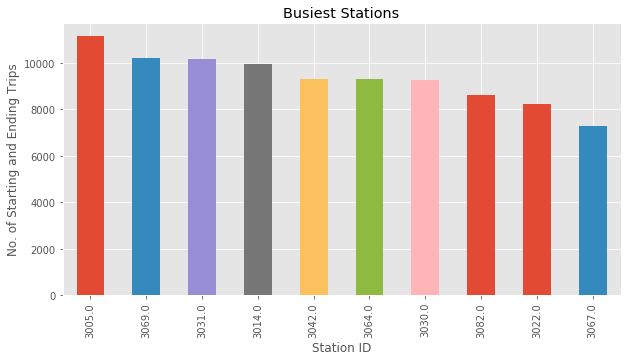

In [11]:
# Which station has most number of starting and ending trips?
(bike['Starting Station ID'].value_counts()+bike['Ending Station ID'].value_counts()).sort_values(ascending =False).head(10).plot(kind='bar',figsize=(10,5))
plt.title('Busiest Stations')
plt.ylabel('No. of Starting and Ending Trips')
plt.xlabel('Station ID')
plt.show()

Okay, Station with ID 3005 is the top station with total trips greater than 11000. Stations 3005, 3069 and 3031 are the top 3 stations and they have crossed the 10000 mark. 

In [12]:
bike[(bike['Starting Station ID']==3005) |(bike['Ending Station ID']==3005 )].head()

Trip ID  Duration          Start Time            End Time  \
99111   1944067       600 2016-07-07 12:59:00 2016-07-07 13:09:00   
110831  1944059       720 2016-07-07 13:03:00 2016-07-07 13:15:00   
102472  1944042       360 2016-07-07 13:10:00 2016-07-07 13:16:00   
132007  1981558     32700 2016-07-07 13:11:00 2016-07-07 22:16:00   
119064  1960057       600 2016-07-07 17:26:00 2016-07-07 17:36:00   

        Starting Station ID  Ending Station ID  Bike ID  Plan Duration  \
99111                3076.0             3005.0   5957.0          365.0   
110831               3063.0             3005.0   6110.0           30.0   
102472               3005.0             3052.0   6295.0          365.0   
132007               3005.0             3021.0   6139.0           30.0   
119064               3063.0             3005.0   6123.0           30.0   

       Trip Route Category Passholder Type  Neighborhood Councils (Certified)  \
99111              One Way       Flex Pass                               76.0   
110831             One Way    Monthly Pass                               76.0   
102472             One Way       Flex Pass                               76.0   
132007             One Way    Monthly Pass                               76.0   
119064             One Way    Monthly Pass                               76.0   

        Council Districts  Zip Codes  LA Specific Plans  Precinct Boundaries  \
99111                 9.0    23075.0                NaN               1050.0   
110831                9.0    23074.0                NaN               1050.0   
102472                9.0    23078.0               54.0                847.0   
132007                9.0    23078.0                NaN                466.0   
119064                9.0    23074.0                NaN               1050.0   

        Census Tracts  
99111           546.0  
110831          546.0  
102472          567.0  
132007          533.0  
119064          546.0

These are the trips of the top Station 3005.

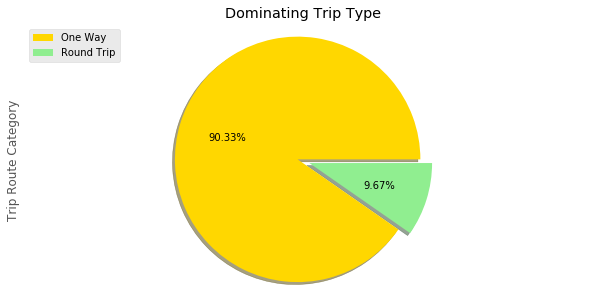

In [13]:
# Which Trip category dominates?
bike['Trip Route Category'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.2f%%',shadow=True,labels=None,colors=['gold','lightgreen'],explode=[0,0.1])
plt.legend(labels=bike['Trip Route Category'].value_counts().index,loc='upper left')
plt.axis('equal')
plt.title('Dominating Trip Type')
plt.show()

No way Round trip can ever overtake One Way trip. Well, its self explanatory why the number of one way trips are greater.

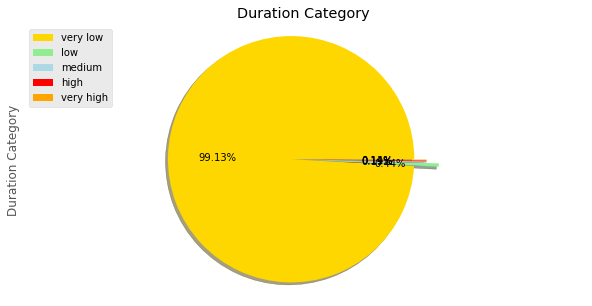

In [14]:
# What is the normal duration for which people ride these bikes?
binwidth=(max(bike['Duration'])-min(bike['Duration']))/6
bins=np.arange(min(bike['Duration']),max(bike['Duration']),binwidth)
bike['Duration Category']=pd.cut(bike['Duration'],bins,labels=['very low','low','medium','high','very high'],include_lowest=True)
bike['Duration Category'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.2f%%',labels=None,shadow=True,colors=['gold','lightgreen','lightblue','red','orange'],explode=[0.1,0.1,0,0,0])
plt.axis('equal')
plt.legend(labels=bike['Duration Category'].value_counts().index,loc='upper left')
plt.title('Duration Category')
plt.show()

Woh! People definitely like low duration ride. It's a bit expected value as no one wants a bike ride of two hours.

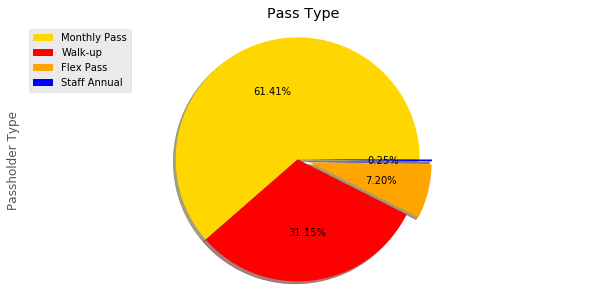

In [15]:
# Count analysis on Passholder type
bike['Passholder Type'].value_counts().plot(kind='pie',figsize=(10,5),autopct='%1.2f%%',shadow=True,labels=None,colors=['gold','red','orange','blue'],explode=[0,0,0.1,0.1])
plt.legend(labels=bike['Passholder Type'].value_counts().index,loc='upper left')
plt.axis('equal')
plt.title('Pass Type')
plt.show()

People like to use Monthly Pass greatly. Of course, it saves payment time. But People do use Walk Up pass.

In [16]:
bike['Hour']=bike['Start Time'].dt.hour

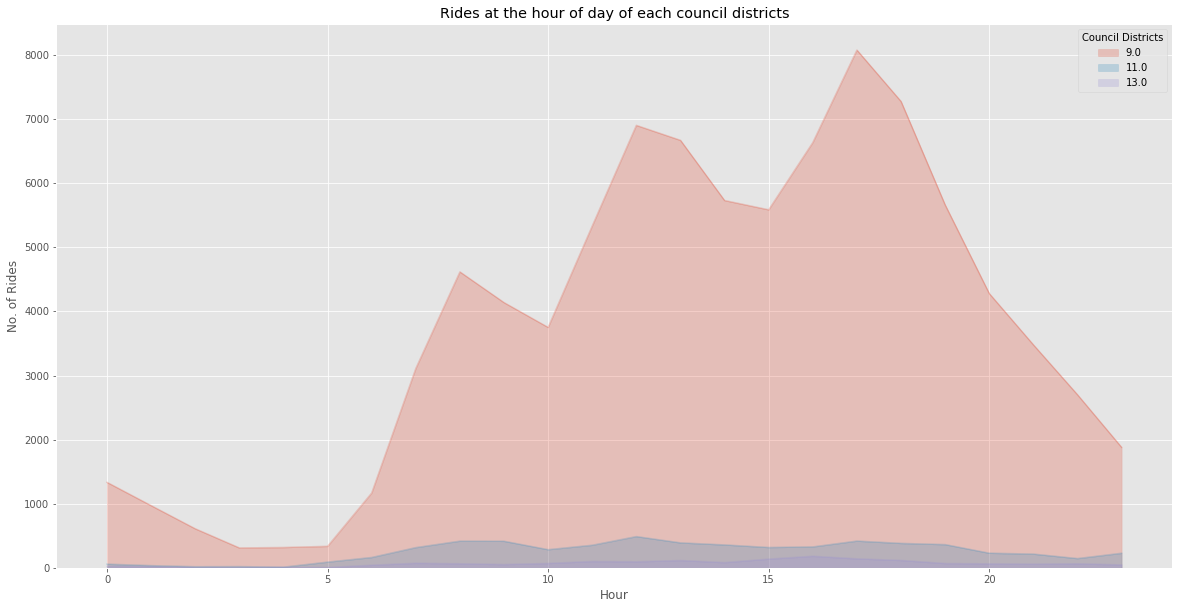

In [17]:
# In which council districts are the bikes used most?
pivot=bike.groupby(['Hour','Council Districts'],as_index=False)['Passholder Type'].agg('count').pivot_table(index='Hour',columns='Council Districts',values='Passholder Type')
pivot.plot(kind='area',stacked=False,alpha=0.25,figsize=(20,10))
plt.title('Rides at the hour of day of each council districts')
plt.ylabel('No. of Rides')
plt.show()

Clearly, Council District 9 has the most number of rides. We can say the system works on this districts. This district is the backbone of the system. Well, People start using these bikes from 5 am. The numbers start rising greatly till 9 am (RUSH HOUR)but drops slightly till 10 am. After that it increases rapidly till 12 pm. The numbers decrease during the period (1pm-3pm). The numbers start rising again till 5 pm after which it dereases linearly. So the prime time of the people using bikes in these districts is during the Rush Hours(self explanatory).

In [18]:
# When is the top 5 busiest stations busiest of all? At what time of day?
top5=[3005,3069,3031,3014,3042]
bike['End Hour']=bike['End Time'].dt.hour
bike.rename(columns={'Hour':'Start Hour'},inplace=True)
bike.head(10)

Trip ID  Duration          Start Time            End Time  \
123343  1912818       180 2016-07-07 04:17:00 2016-07-07 04:20:00   
101945  1919661      1980 2016-07-07 06:00:00 2016-07-07 06:33:00   
90791   1933383       300 2016-07-07 10:32:00 2016-07-07 10:37:00   
124706  1944197     10860 2016-07-07 10:37:00 2016-07-07 13:38:00   
78401   1940317       420 2016-07-07 12:51:00 2016-07-07 12:58:00   
111762  1944075       780 2016-07-07 12:51:00 2016-07-07 13:04:00   
83390   1944073       600 2016-07-07 12:54:00 2016-07-07 13:04:00   
99111   1944067       600 2016-07-07 12:59:00 2016-07-07 13:09:00   
108985  1944062      2880 2016-07-07 13:01:00 2016-07-07 13:49:00   
104557  1944063       960 2016-07-07 13:01:00 2016-07-07 13:17:00   

        Starting Station ID  Ending Station ID  Bike ID  Plan Duration  \
123343               3014.0             3014.0   6281.0           30.0   
101945               3014.0             3014.0   6281.0           30.0   
90791                3016.0             3016.0   5861.0          365.0   
124706               3016.0             3016.0   5861.0          365.0   
78401                3032.0             3032.0   6674.0            0.0   
111762               3021.0             3054.0   6717.0           30.0   
83390                3022.0             3014.0   5721.0           30.0   
99111                3076.0             3005.0   5957.0          365.0   
108985               3031.0             3031.0   6137.0          365.0   
104557               3031.0             3078.0   6351.0           30.0   

       Trip Route Category Passholder Type  Neighborhood Councils (Certified)  \
123343          Round Trip    Monthly Pass                               28.0   
101945          Round Trip    Monthly Pass                               28.0   
90791           Round Trip       Flex Pass                               76.0   
124706          Round Trip       Flex Pass                               76.0   
78401           Round Trip         Walk-up                               76.0   
111762             One Way    Monthly Pass                               28.0   
83390              One Way    Monthly Pass                               28.0   
99111              One Way       Flex Pass                               76.0   
108985          Round Trip       Flex Pass                               76.0   
104557             One Way    Monthly Pass                               76.0   

        Council Districts  Zip Codes  LA Specific Plans  Precinct Boundaries  \
123343                9.0    22728.0               27.0               1322.0   
101945                9.0    22728.0               27.0               1322.0   
90791                 9.0    22728.0                NaN               1502.0   
124706                9.0    22728.0                NaN               1502.0   
78401                 9.0    23078.0                NaN                733.0   
111762                9.0    23074.0                NaN               1287.0   
83390                 9.0    22728.0               27.0               1322.0   
99111                 9.0    23075.0                NaN               1050.0   
108985                9.0    23075.0                NaN                683.0   
104557                9.0    23075.0                NaN                449.0   

        Census Tracts Duration Category  Start Hour  End Hour  
123343          532.0          very low           4         4  
101945          532.0          very low           6         6  
90791           543.0          very low          10        10  
124706          543.0          very low          10        13  
78401           546.0          very low          12        12  
111762          533.0          very low          12        13  
83390           532.0          very low          12        13  
99111           546.0          very low          12        13  
108985          541.0          very low          13        13  
104557          540.

In [19]:
start=bike[bike['Starting Station ID'].isin(top5)].groupby(['Start Hour','Starting Station ID'],as_index=False)['Passholder Type'].agg('count')

In [20]:
end=bike[bike['Ending Station ID'].isin(top5)].groupby(['End Hour','Ending Station ID'],as_index=False)['Passholder Type'].agg('count')

In [21]:
start.rename(columns={'Start Hour':'Hour','Starting Station ID':'Station ID','Passholder Type':'Rides'},inplace=True)
end.rename(columns={'End Hour':'Hour','Ending Station ID':'Station ID','Passholder Type':'Rides'},inplace=True)

In [22]:
Rides=start.append(end,ignore_index=True).groupby(['Hour','Station ID'],as_index=False)['Rides'].agg('sum')

In [23]:
pivot=Rides.pivot_table(index='Hour',columns='Station ID',values='Rides')

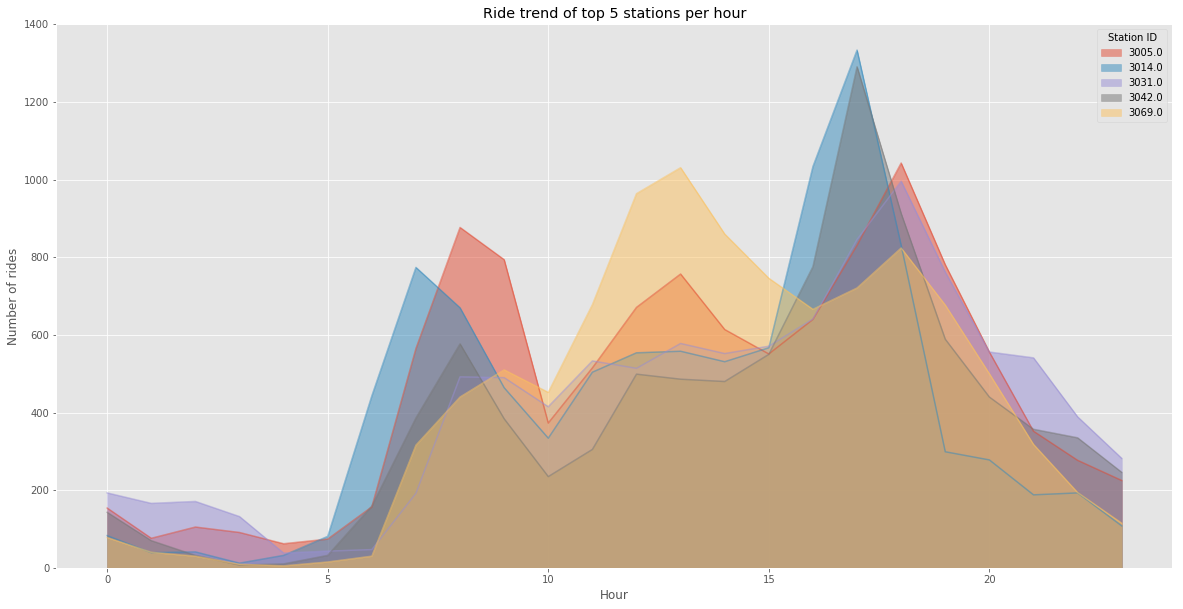

In [24]:
pivot.plot(kind='area',stacked=False,alpha=0.5,figsize=(20,10))
plt.title('Ride trend of top 5 stations per hour')
plt.ylabel('Number of rides')
plt.show()

What a graph! Looks like the busiest station 3005 does not become as busy as the busiest time of 3014. 
3069: The day starts at 5 am. The rides increrase considerably till 12 pm with a slight bounce in the graph. The rides decrease after 1 pm but increase considerably till 5pm after which the numbers decrease linearly.
3014: A very interesting station. At the start of their day, they see a very sharp increase in its number of rides till 7 am. After that the rides somewhat moderate out. The number of rides increase very highly during 3pm to 7pm. The increase is so surprising that it crosses 1300 mark which is greater than the busiest time of the busiest station which is just over 1000.
3031: Their day starts off slow and somewhat consistent after 8 am. The only time they get busy is during 6 pm, when people return.
3042: Another station with the peculiar characteristic of 3014. Its day starts off too with a sharp rise in its rides after 5 am and becomes maximum at 8 am. Then it decreases a bit. But then it increases to an extent that it matches the busiest time of 3014. 
3005: Their day starts too with a sharp increase in the numbers but soon decreases till 10am after which it increases till 12pm. The busiest time (i.e., 6 pm) cannot cross the busiest times of 3014 and 3042.
Every station has its own peculiarity. Turns out that though 3005 has the highest average number of rides but its busiest time is nothing as compared to the busiest times of 3014 and 3042.

# Conclusion

The backbone of the Bike Share System is dug in Council District 9. People do not seem to use bike share trips on districts other than District 9. People mainly use Monthly Pass with few of them using Walk Up pass. The normal duration for which people hire these bikes are for a very low duration and for only one way trip. They do use Round Trips but not as mush as one way trip. The Top 5 Stations are 3005,3014,3042,3069 and 3031. Among them, 3005 has the highest average rides. But this station does not get as crazy as 3014 and 3042 from 4pm to 7 pm. For an increase in profit, the management should increase the number of bikes in 3005,3014 and 3042 in the morning. They should increase bikes in stations 3005 and 3069 from 11 am to 1 pm. They must increase bikes in all the stations from 3 pm to 7 pm get an exponential increase in their profit.  
I hope you have acquired many useful informations from this analysis which may help you in future. 

# Thank you